In [18]:
import pylab
from skimage.io import imread

L = 256
k = 0.5

root ='/home/marcelo/PV_Cell/'

fnamesF = []
with open(root+"Sem_Defeito.txt") as f:
 fnamesF = [s.strip() for s in f]

fnamesT = []
with open(root+"Defeito.txt") as f:
 fnamesT =  [s.strip() for s in f]

imF = [imread(root+"Sem_Defeito/"+f) for f in fnamesF]
imT = [imread(root+"Defeito/"+f) for f in fnamesT]

im = {-1:imF,1:imT}

msk = imread("/home/marcelo/cell_msk.png")

fc = pylab.vectorize(lambda r,k,L: (L-1)*pylab.log2(k*r+1)/pylab.log2(k*(L-1)+1))

l = []
for label,img_list in im.items():
    for im in img_list:
        aux = msk & im 
        l.append([label]+aux[pylab.where(aux != 0)].flatten().tolist())
l = pylab.array(l)        

# Contaste

## Funções de ajuste

#### $ f(r) =(L-1).\frac{\log_2{(k.r+1)}}{\log_2{(k.(L-1)+1)}} \text{, }$ k > 0$ \text{ e } 0 \le L \le 255$

- Expande pixels escuros
- Comprime pixels claros

#### $ g(r) =(L-1).\frac{2^{k.r}-1}{2^{k.(L-1)}-1} \text{, }$ k > 0$ \text{ e } 0 \le L \le 255$

- Expande pixels claros
- Comprime pixels escuros



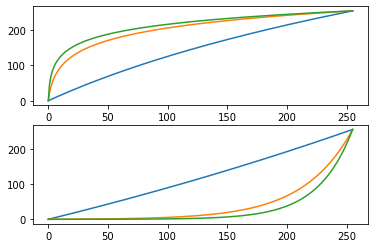

In [28]:
        
    f = pylab.vectorize(lambda r,k,L: (L-1)*pylab.log2(k*r+1)/pylab.log2(k*(L-1)+1))
    g = pylab.vectorize(lambda r,k,L: (L-1)*(2**(k*r)-1)/(2**(k*(L-1))-1))
    
    N = 256
    k0 = [0.005,.5,2.0]
    k1 = [0.002,0.035,0.05]
   
    r = pylab.arange(N)
    pylab.subplot(211)
    pylab.plot(r,f(r,k0[0],N))
    pylab.plot(r,f(r,k0[1],N))
    pylab.plot(r,f(r,k0[2],N))
    pylab.subplot(212)
    pylab.plot(r,g(r,k1[0],N))
    pylab.plot(r,g(r,k1[1],N))
    pylab.plot(r,g(r,k1[2],N))  
    

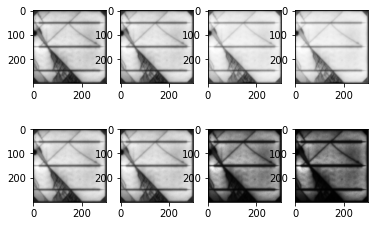

In [11]:
img = imread('/home/marcelo/defeito/cell0524.png')

im0 = [img]+[f(img,k,N) for k in k0]

for s,im in zip([241,242,243,244],im0):
 pylab.subplot(s)
 pylab.imshow(im,pylab.cm.gray)

im1 = [img]+[g(img,k,N) for k in k1]

for s,im in zip([245,246,247,248],im1):
 pylab.subplot(s)
 pylab.imshow(im,pylab.cm.gray)


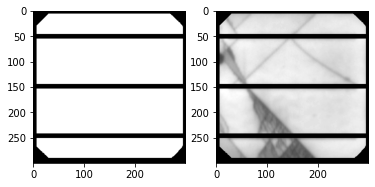

In [13]:
msk = imread("/home/marcelo/cell_msk.png")
img2_msk = msk & pylab.uint8(im0[1])
pylab.subplot(121)
pylab.imshow(msk,'gray')
pylab.subplot(122)
pylab.imshow(img2_msk,'gray')

In [ ]:
vec = img2_msk[pylab.where(img2_msk != 0)].flatten()               